<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_32_Discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import KBinsDiscretizer


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Manish-k723/100-days-of-ML/main/train.csv', usecols = ['Age','Fare', 'Survived'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [6]:
df.dropna(inplace =True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [18]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_pred, y_test)*100

63.63636363636363

In [23]:
np.mean(cross_val_score(clf, x, y, cv = 10, scoring = 'accuracy'))

0.6289319248826292

Now, going to apply binning

In [32]:
kbin_age = KBinsDiscretizer(n_bins = 5, strategy = 'kmeans', encode = 'ordinal')
kbin_fare = KBinsDiscretizer(n_bins = 5, strategy = 'kmeans', encode = 'ordinal')

trf = ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second', kbin_fare,[1])])

In [39]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1.        , 13.54505632, 25.49492263, 36.14664502, 48.33333333,
              62.        ])                                                   ],
      dtype=object)

In [51]:
x_train_trans = trf.fit_transform(x_train)
x_test_trans = trf.transform(x_test)

clf = DecisionTreeClassifier()

clf.fit(x_train_trans, y_train)
y_pred = clf.predict(x_test_trans)

accuracy_score(y_test,y_pred)

0.6223776223776224

No improvement

In [52]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trans[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trans[:,1]
})

output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [53]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,2.0,20.5250,0.0,"(27.028, 39.354]","(0.0, 42.424]"
73,26.0,1.0,14.4542,0.0,"(12.696, 27.028]","(0.0, 42.424]"
253,30.0,2.0,16.1000,0.0,"(27.028, 39.354]","(0.0, 42.424]"
719,33.0,2.0,7.7750,0.0,"(27.028, 39.354]","(0.0, 42.424]"
666,25.0,1.0,13.0000,0.0,"(12.696, 27.028]","(0.0, 42.424]"
...,...,...,...,...,...,...
92,46.0,3.0,61.1750,1.0,"(39.354, 54.215]","(42.424, 100.624]"
134,25.0,1.0,13.0000,0.0,"(12.696, 27.028]","(0.0, 42.424]"
337,41.0,3.0,134.5000,2.0,"(39.354, 54.215]","(100.624, 186.5]"
548,33.0,2.0,20.5250,0.0,"(27.028, 39.354]","(0.0, 42.424]"


In [62]:
kbin_age1 = KBinsDiscretizer(n_bins = 15, strategy = 'quantile', encode = 'ordinal')
kbin_fare1 = KBinsDiscretizer(n_bins = 15, strategy = 'quantile', encode = 'ordinal')

trf1 = ColumnTransformer([
    ('first', kbin_age1,[0]),
    ('second', kbin_fare1,[1])])

x_train_trans1 = trf1.fit_transform(x_train)
x_test_trans1 = trf1.transform(x_test)

clf1 = DecisionTreeClassifier()

clf1.fit(x_train_trans1, y_train)
accuracy_score(y_test,clf1.predict(x_test_trans1))

0.6363636363636364

In [75]:
kbin_age2 = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'ordinal')
kbin_fare2 = KBinsDiscretizer(n_bins = 10
                              , strategy = 'uniform', encode = 'ordinal')

trf2 = ColumnTransformer([
    ('first', kbin_age2,[0]),
    ('second', kbin_fare2,[1])])

x_train_trans2 = trf2.fit_transform(x_train)
x_test_trans2 = trf2.transform(x_test)

clf2 = DecisionTreeClassifier()

clf2.fit(x_train_trans2, y_train)
accuracy_score(y_test,clf2.predict(x_test_trans2))

0.6783216783216783

In [89]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(x)
    print('Cross Val Score is {}'.format(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Age Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("Age After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Fare Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare After")

    plt.show()

Cross Val Score is 0.6330985915492957


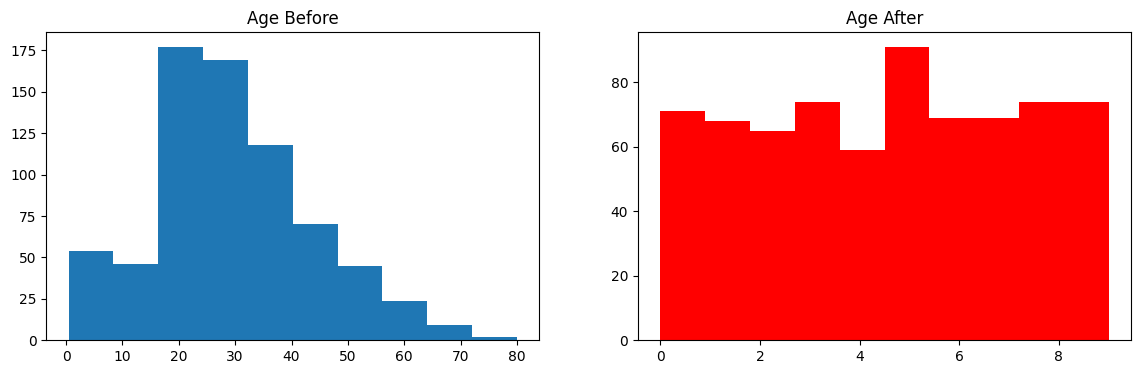

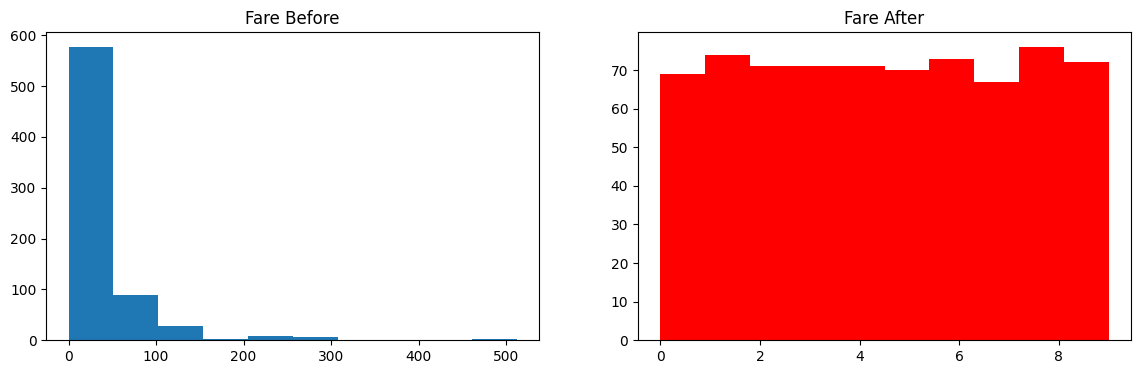

In [90]:
discretize(10,'quantile')

The change is very clear. In each bin, there is almost equal number of items. This is what quantile binner do.

0.6373435054773082


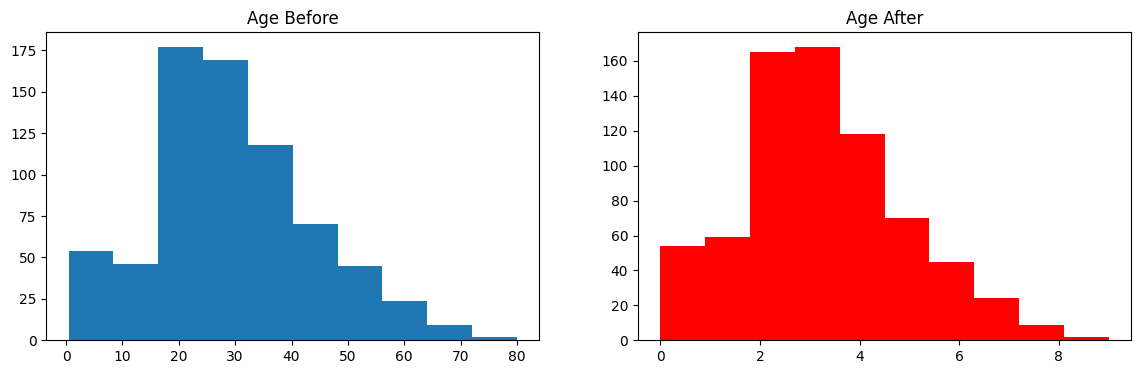

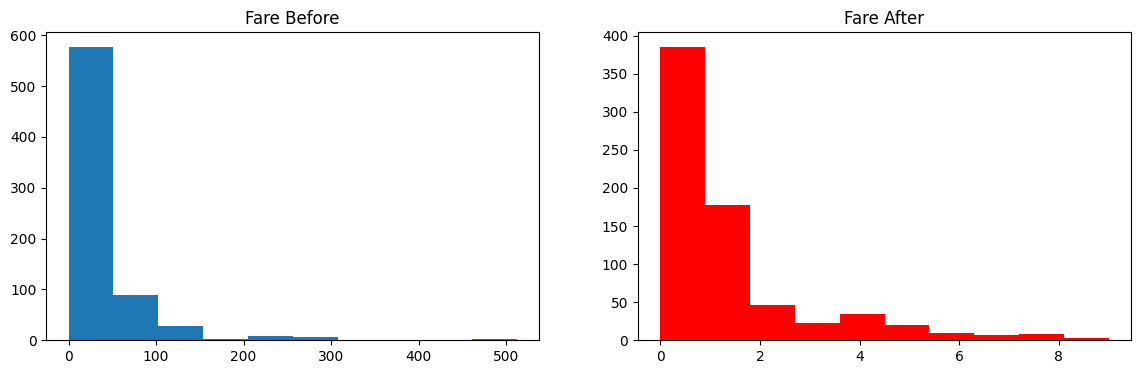

In [88]:
discretize(10,'kmeans')

No much changes.

0.6359350547730829


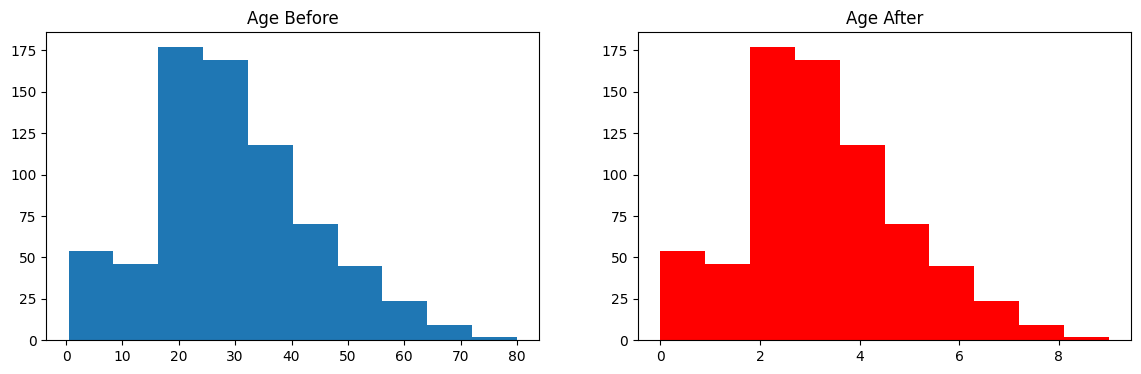

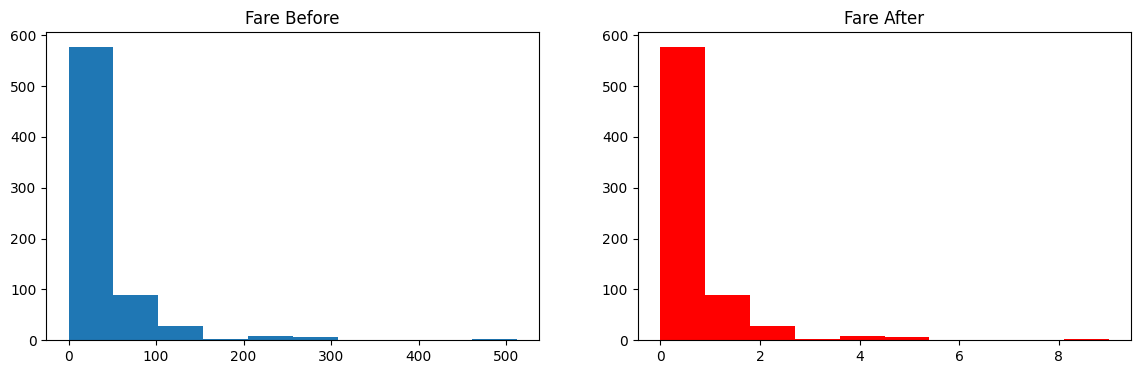

In [87]:
discretize(10,'uniform')

No changes.

# **Binarization**

In [92]:
from sklearn.preprocessing import Binarizer
# It can be used for cases like yes or no sometimes.

In [ ]:
# trf = ColumnTransformer([
#     ('bin',Binarizer(copy=False),['family'])
# ],remainder='passthrough')